# This creates figs 4 'evolution of particle probabilities' and 5 'Combination of STM and LTM'

'Run all' will create Fig 4 panels A & B and fig 5.

Note that the'evolution of particle probabilities' cell is duplicated, once with sigma = 3.0, then once with 1.0, as fig 5 is created by 'Combination of STM and LTM' which uses the data generated by 'evolution of particle probabilities' with sigma = 1.0.

Ignore the warnings - they're warnings not errors.
You can make them go away by uncommenting:

import warnings
warnings.filterwarnings("ignore")



In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import scipy.stats as stats
import math

# uncomment to ignore warnings
#import warnings
#warnings.filterwarnings("ignore")


decay = 0.7
sigma = 1.0


In [3]:
# This is the thurstone procedure from the PF progs
def np_thurstone_sd(inp, sd):
    out = np.zeros(len(inp))
    exps = np.zeros(len(inp))
    # need this to make actual SD do the right thing in Luce
    luce_noise = math.sqrt(2.0)/sd

    for i, val in enumerate(inp):
        if val > 0.0:  # ignore the suppressed -infs
            exps[i] = math.exp(luce_noise * val)
        else:
            exps[i] = 0.0
    sum_exps = sum(exps)
    out = exps/sum_exps

    return out


## This generates figs 4A/B 'evolution of particle probabilities'


Panels A and B  illustrate the evolution of particle probabilities over the course of recall given that the recalled sequence is ABCDE. There are only three particles (columns 1-3) in LTM with gradients corresponding to the orders ABCDE, ACEBD  and ABDCE. The fourth column gives the normalised prior probabilities summed over all particles in LTM. This is the LTM prior. For the first three columns  the bars in each cell (A-E) represent the probabilities of recalling each remaining item given the sequence of items recalled so far (always ABCDE). Note that even for the particle representing ABCDE the conditional probability decreases over the course of recall as the probability of correctly recalling the matching input item is always less than one. After recall of A, the particles ABCDE and ABDCE  both assign highest probabilities to B as the next item to be recalled, while the ADCEB particle assigns the highest probability to D.  Once B has been recalled the ADCEB particle makes little further contribution to the overall probability as the probability of recalling the sequence AB given the particle ADCEB is very small. After D has been recalled the LTM probability is 1 as this is the only choice remaining.
Panel B uses a larger value of LTM noise than panel A (3 versus 1) and therefore results in a flatter profile of item probabilities at each recall position.





[[5 4 3 2 1]
 [5 3 1 4 2]
 [5 4 2 3 1]]


/var/folders/cf/z660bzjd6f9btxnl031262pshw0156/T/ipykernel_41290/614854905.py:66: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[posn,col].set_xticklabels(blank)
/var/folders/cf/z660bzjd6f9btxnl031262pshw0156/T/ipykernel_41290/614854905.py:69: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[posn,col].set_xticklabels(labels)
/var/folders/cf/z660bzjd6f9btxnl031262pshw0156/T/ipykernel_41290/614854905.py:76: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[posn,col].set_yticklabels(blank)


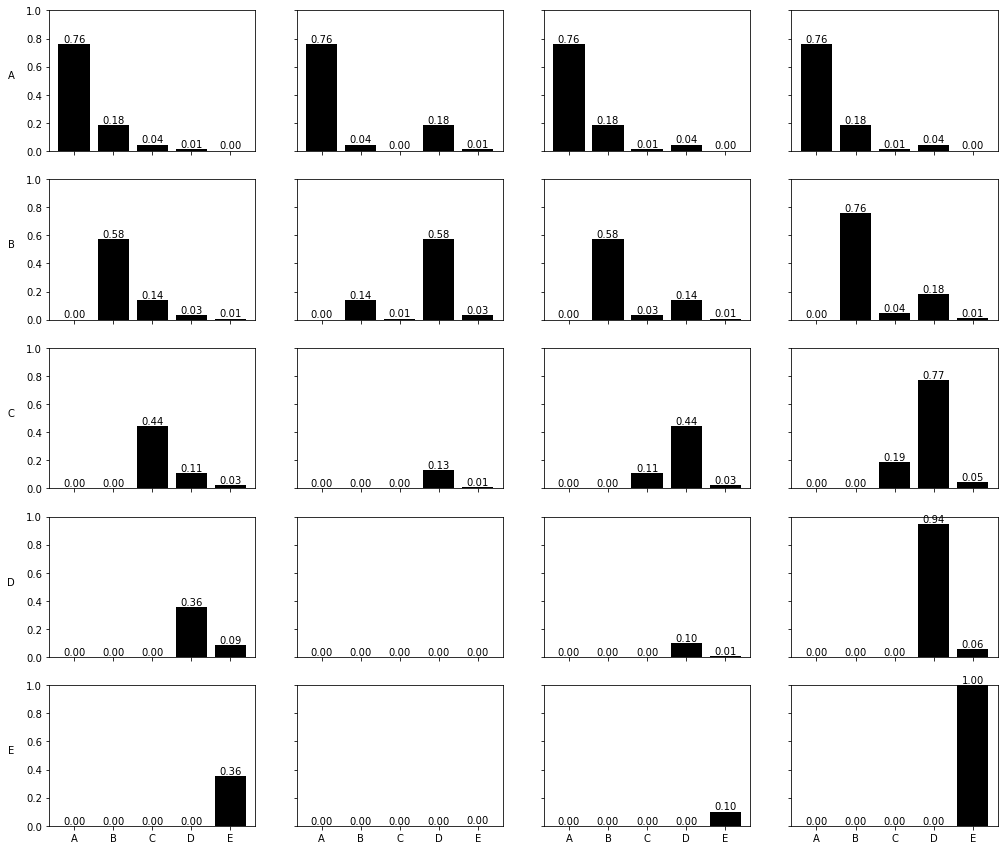

In [12]:
# sigm = 1, so that the cell for fig 5 can be run useing the data here
# evolution of particle probabilities
# I'm picking the conditional out from all_probies[col][posn][0]) which s zero after the first posn
sigma = 1.0
num_cols = 4

gradient = np.array([5,4,3,2,1]) # this determines the order that the particle represents
#posns = len(gradient)
posns = [0,1,2,3,4]
n_posns = len(posns)
all_gradients = np.array([[5,4,3,2,1],[5,3,1,4,2],[5,4,2,3,1]])
# i.e. ABCDE, ADCEB , ABDCE
conditional_ps = np.full((num_cols,5),1.0)
prev_conditional_p = 1.0
all_probies = np.zeros((num_cols,5,5))


print(all_gradients)
                      



labels = ['x','A','B','C','D','E'] # no idea why it eats the first label
blank = ['','','','','','',]
#plt.xticks(posns, labels)


fig, ax = plt.subplots(5,num_cols,figsize=(17,15))
for col in range(num_cols -1): # don't do the last col a that's for the normalised Ps
#    sigma_decayed = sigma # reset sigma_decayed
    prev_conditional_p = 1.0
    for posn in range(len(gradient)): # posn is recall position NOT item at a particular recall
        
        
        
#        print('OOOO prev_conditional_ps[posn] ',prev_conditional_ps)
        all_probies[col, posn] = np_thurstone_sd(all_gradients[col], sigma)
        conditional_ps[col,posn] = prev_conditional_p # record the conditional ps for this col/posn
        prev_conditional_p *= all_probies[col][posn][posn]
    
#        sigma_decayed = sigma/decay # do decay
        all_gradients[col,posn] = 0 # suppress item
    #    plt.ylim((0,10.0))
        
    

#print('\nall_probies, *******************\n',all_probies)  
#print('\nconditional_ps, #######\n',conditional_ps)

# normalise the 3 particle Ps and create the summed and normalised LTM
# we're normalising across cols at each posn
for posn in range(len(gradient)): # posn is recall position NOT item at a particular recall
    for col in range(num_cols -1): # don't do the last col as that's for the normalised Ps will fo
 
        all_probies[col,posn] *= conditional_ps[col,posn]
       
        all_probies[num_cols -1, posn] =  all_probies[col, posn] / all_probies[col, posn].sum(0)

    
# now we have all of the data we can make the plots
for col in range(num_cols):  
    for posn in range(len(gradient)):
        ax[posn,col].set_ylim(0,1)
     #   if posn == len(gradient) -1 or col == 0:
        if posn < n_posns-1:
            ax[posn,col].set_xticklabels(blank)     
           
        else: 
            ax[posn,col].set_xticklabels(labels)
            
    #    ax[i].set(ylabel=str(i+1))
        if col == 0:
            ax[posn,col].set_ylabel(labels[posn+1], rotation='0')
            ax[posn,col].yaxis.labelpad = 15
        else:
            ax[posn,col].set_yticklabels(blank)
    #    ax[i] = mfig.add_subplot(subplot_posns[i])
        # put the values on the bars
        bars = ax[posn,col].bar(np.arange(len(all_probies[col,posn])),all_probies[col,posn], color='black')
        ax[posn,col].bar_label(bars, fmt='%.2f')




plt.show()
    

[[5 4 3 2 1]
 [5 3 1 4 2]
 [5 4 2 3 1]]


/var/folders/cf/z660bzjd6f9btxnl031262pshw0156/T/ipykernel_41290/839174715.py:66: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[posn,col].set_xticklabels(blank)
/var/folders/cf/z660bzjd6f9btxnl031262pshw0156/T/ipykernel_41290/839174715.py:69: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[posn,col].set_xticklabels(labels)
/var/folders/cf/z660bzjd6f9btxnl031262pshw0156/T/ipykernel_41290/839174715.py:76: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[posn,col].set_yticklabels(blank)


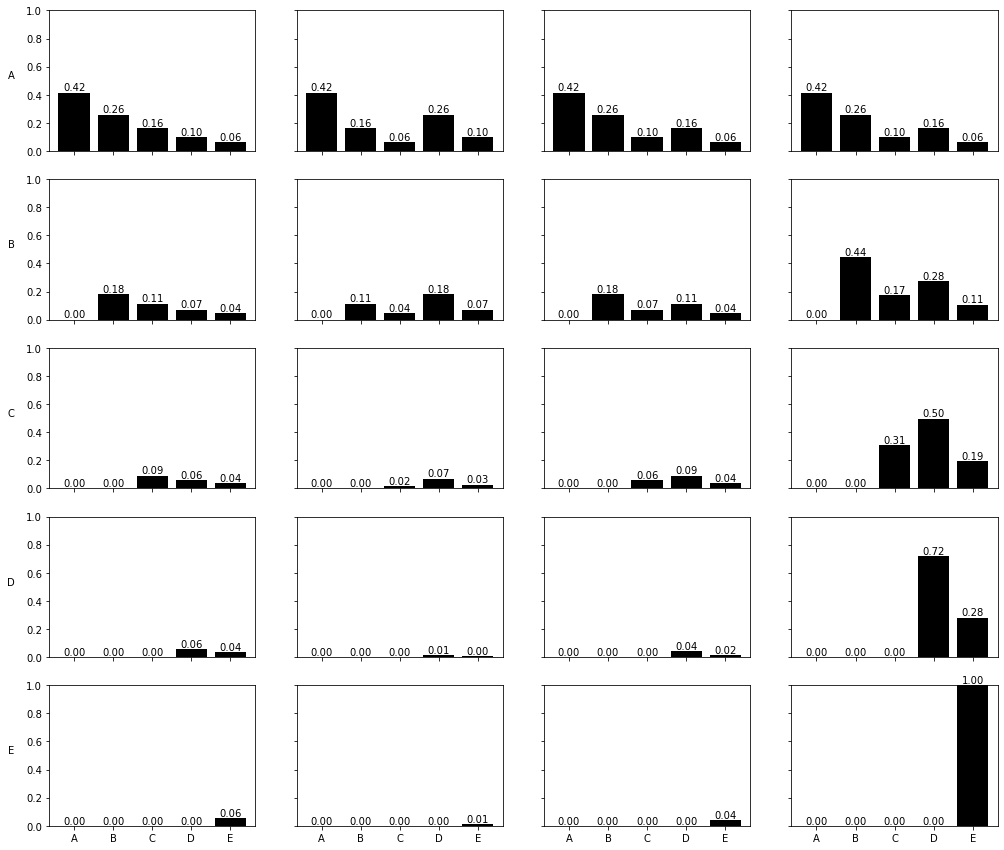

In [13]:
# sigm = 3, so that the cell for fig 5 can be run useing the data here
# evolution of particle probabilities
# I'm picking the conditional out from all_probies[col][posn][0]) which s zero after the first posn
sigma = 3.0
num_cols = 4

gradient = np.array([5,4,3,2,1]) # this determines the order that the particle represents
#posns = len(gradient)
posns = [0,1,2,3,4]
n_posns = len(posns)
all_gradients = np.array([[5,4,3,2,1],[5,3,1,4,2],[5,4,2,3,1]])
# i.e. ABCDE, ADCEB , ABDCE
conditional_ps = np.full((num_cols,5),1.0)
prev_conditional_p = 1.0
all_probies = np.zeros((num_cols,5,5))


print(all_gradients)
                      



labels = ['x','A','B','C','D','E'] # no idea why it eats the first label
blank = ['','','','','','',]
#plt.xticks(posns, labels)


fig, ax = plt.subplots(5,num_cols,figsize=(17,15))
for col in range(num_cols -1): # don't do the last col a that's for the normalised Ps
#    sigma_decayed = sigma # reset sigma_decayed
    prev_conditional_p = 1.0
    for posn in range(len(gradient)): # posn is recall position NOT item at a particular recall
        
        
        
#        print('OOOO prev_conditional_ps[posn] ',prev_conditional_ps)
        all_probies[col, posn] = np_thurstone_sd(all_gradients[col], sigma)
        conditional_ps[col,posn] = prev_conditional_p # record the conditional ps for this col/posn
        prev_conditional_p *= all_probies[col][posn][posn]
    
#        sigma_decayed = sigma/decay # do decay
        all_gradients[col,posn] = 0 # suppress item
    #    plt.ylim((0,10.0))
        
    

#print('\nall_probies, *******************\n',all_probies)  
#print('\nconditional_ps, #######\n',conditional_ps)

# normalise the 3 particle Ps and create the summed and normalised LTM
# we're normalising across cols at each posn
for posn in range(len(gradient)): # posn is recall position NOT item at a particular recall
    for col in range(num_cols -1): # don't do the last col as that's for the normalised Ps will fo
 
        all_probies[col,posn] *= conditional_ps[col,posn]
       
        all_probies[num_cols -1, posn] =  all_probies[col, posn] / all_probies[col, posn].sum(0)

    
# now we have all of the data we can make the plots
for col in range(num_cols):  
    for posn in range(len(gradient)):
        ax[posn,col].set_ylim(0,1)
     #   if posn == len(gradient) -1 or col == 0:
        if posn < n_posns-1:
            ax[posn,col].set_xticklabels(blank)     
           
        else: 
            ax[posn,col].set_xticklabels(labels)
            
    #    ax[i].set(ylabel=str(i+1))
        if col == 0:
            ax[posn,col].set_ylabel(labels[posn+1], rotation='0')
            ax[posn,col].yaxis.labelpad = 15
        else:
            ax[posn,col].set_yticklabels(blank)
    #    ax[i] = mfig.add_subplot(subplot_posns[i])
        bars = ax[posn,col].bar(np.arange(len(all_probies[col,posn])),all_probies[col,posn], color='black')
        
        # put the values on the bars
        bars = ax[posn,col].bar(np.arange(len(all_probies[col,posn])),all_probies[col,posn], color='black')
        ax[posn,col].bar_label(bars, fmt='%.2f')



plt.show()
    

###  This one does STM (ABCDE) and LTM from above and the posterior assuming recall is ABCDE
#### BEWARE - the cell above must be run before this with sigma = 1.0

I should add the col headings
       STM    LTM   recall probabilities

Fig caption:

Combination of STM and LTM. Here we assume that the sequence presented is ABCDE and that this is recalled in the correct order even though, because of the influence of LTM, this is not the most likely order. (ABDCE??) All probabilities are therefore conditional on having recalled the correct subsequence of ABCDE. The first column (STM) represents the recall probabilities as determined form STM itself. This includes decay. LTM is the probabilities as generated for LTM in Figure 3. Recall probabilities are the normalized product of STM and LTM. Recall is driven by choosing the next remaining item weighted by these probabilities. 

Note that before C is recalled the most likely item to be recalled next is actually D because of the influence of LTM. However, although D is the most likely item to be recalled, the correct item (C) will also often be recalled, and this is what is assumed here. The fact that the probabilities before recall of E are all 1.0 does not mean that the final items is always recalled correctly as this probability is conditional on having recalled ABCD. There is some probability that the recalled sequence at this point might be ABCE instead and therefore the final item recalled would be D.
 


In [ ]:
# Combination of STM and LTM
#sigma = 1
gradient = np.array([5,4,3,2,1]) # this determines the order that the particle represents
STM_ps = np.zeros((3,5,5))
posns = [0,1,2,3,4]

# first do straightforward STM with decay
for posn in range(n_posns):
    STM_ps[0,posn] = np_thurstone_sd(gradient,sigma)
    sigma = sigma/decay # do decay
    gradient[posn] = 0 # suppress item
    STM_ps[1,posn] = all_probies[num_cols -1, posn] # this comes from running the 
                                                    # evolution of particle probabilities
                                                    # cell above
    STM_ps[2,posn] = (STM_ps[0,posn] * STM_ps[1,posn])
    '''
    print('STM_ps[2,posn]',STM_ps[2,posn])
    print('STM_ps[2,posn].sum()',STM_ps[2,posn].sum())
    print(STM_ps[0,posn].sum())
    print(STM_ps[1,posn].sum())
    '''
    
    STM_ps[2,posn] /= STM_ps[2,posn].sum()
    
    
#print(STM_ps)

   
# now we have all of the data we can make the plots
fig, ax = plt.subplots(5,3,figsize=(17,15))
for col in range(3):  
    for posn in range(n_posns):
        ax[posn,col].set_ylim(0,1)
     #   if posn == len(gradient) -1 or col == 0:
        if posn < n_posns-1:
            ax[posn,col].set_xticklabels(blank)     
           
        else: 
            ax[posn,col].set_xticklabels(labels)
            
    #    ax[i].set(ylabel=str(i+1))
        if col == 0:
            ax[posn,col].set_ylabel(labels[posn+1], rotation='0')
            ax[posn,col].yaxis.labelpad = 15
        else:
            ax[posn,col].set_yticklabels(blank)
    #    ax[i] = mfig.add_subplot(subplot_posns[i])
        ax[posn,col].bar(np.arange(len(STM_ps[col,posn])),STM_ps[col,posn], color='black')


plt.show()

    
    